### Crime Rates, Harry Rittenhouse:


![Alt Text](https://media.giphy.com/media/RYjnzPS8u0jAs/giphy.gif)



I am analyzing broad spectrum crime statistics listed in the **City of Pittsburgh Plotter Data**, this is a list of data that has tracked and recorded all reported incidents in and around Pittsburgh since 2016.

The Pittsburgh Police Department uses a hierarchical system to rank the "seriousness" of crimes listed in the plotter data. I will be looking specifically at overall frequency of offenses committed per neighborhood.




In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('incident_data.csv')
df.head(5)







,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


The dataset sample above showcases its format where the exact time, address, neighborhood, and offense committed are listed. I am honing in specifically on crime location and crime frequency.



## Unique Neighborhoods:

As shown below, the PPD Blotter Data lists 96 unique neighborhoods in and around Pittsburgh, along with the number of reported crimes per in descending order.






In [2]:
crimestats = pd.DataFrame(df['INCIDENTNEIGHBORHOOD'].value_counts())

df.sort_values('INCIDENTNEIGHBORHOOD')
crimestats.reset_index(inplace=True)
crimestats.head(98)

,index,INCIDENTNEIGHBORHOOD
0,South Side Flats,16889
1,Central Business District,16161
2,Carrick,10457
3,Bloomfield,7854
4,Shadyside,7654
...,...,...
93,Ridgemont,274
94,Troy Hill-Herrs Island,252
95,Outside County,211
96,Mt. Oliver Neighborhood,117


Within this data, I decided to rule out any neighborhoods with more than 600 reported incidents regardless of type. This leaves 14 potential safest neighborhoods, not including 'Outside County' and 'Outside State'.

,index,INCIDENTNEIGHBORHOOD
82,Oakwood,565
83,Regent Square,515
84,Hays,502
85,Arlington Heights,488
86,Summer Hill,465
87,Mount Oliver,453
88,Swisshelm Park,394
89,East Carnegie,380
90,New Homestead,309
91,Outside State,303


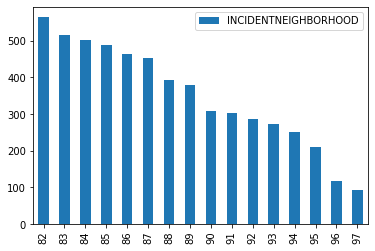

In [3]:

#crimestats = crimestats.drop('Outside County')
#crimestats = crimestats.drop('Outside State')
crimestats.iloc[82:98].plot.bar()

crimestats.iloc[82:98].head(16)




Next, I am going to compare the populations of the 14 neighborhoods listed above with that of their respective crime rates to deviate an objective "winner" of safest neighborhood per these metrics. 

### Populations...

Below is a 2020 Census CSV also from the WPRDC, listing every neighborhood's population. This is immensly helpful as we can now combine crime stats and population to come to a conclusion on safest neighborhood based solely on these two metrics/dataframes.

In [4]:
df2 = pd.read_csv('population.csv')

#df3 = pd.merge(crimestats, df2)
df3 = pd.merge(crimestats, df2, left_on="index", right_on= "Neighborhood")

print(df3.columns)



df2.head(89)



Index(['index', 'INCIDENTNEIGHBORHOOD', 'Neighborhood',
       '2010_Total_Population', '2010_OneRace_Population',
       '2010_White_Alone_Population', '2010_Black_Alone_Population',
       '2010_American_Indian_and_Alaska_Native_alone_population',
       '2010_Asian_Alone_Population',
       '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population',
       '2010_Any_other_single_race_alone_Popualtion',
       '2010_Population_two_or_more_races',
       '2010_Hispanic_or_Latino_Population', '2020_Total_Population',
       '2020_OneRace_Population', '2020_White_Alone_Population',
       '2020_Black_Alone_Population',
       '2020_American_Indian_and_Alaska_Native_alone_population',
       '2020_Asian_Alone_Population',
       '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population',
       '2020_Any_other_single_race_alone_Popualtion',
       '2020_Population_two_or_more_races',
       '2020_Hispanic_or_Latino_Population',
       'Change_2010_to_2020_Total_Population

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_population,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Population,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Upper Lawrenceville,2669,2590,1754,751,10,37,1,37,79,...,-275,-324,264,-597,-5,37,-1,-22,49,-17
85,West End,254,235,135,95,0,2,0,3,19,...,-49,-55,-17,-45,1,4,2,0,6,10
86,West Oakland,2604,2558,1373,1003,7,169,0,6,46,...,-70,-103,159,-395,-1,28,2,104,33,51
87,Westwood,3066,2980,2535,250,3,174,1,17,86,...,266,167,-339,28,0,418,1,59,99,78


Through the data merge method, I can combine my crime stat and population CSVs to get better results in our tables/graphs. 

In order to derive the crime rate per person, total population must be divided by total crime incidents. Upon creating a new column to account for these crime rate indexes, and renaming the columns to make them look **pretty**, we get this:  

In [5]:




df3newcol = df3['INCIDENTNEIGHBORHOOD'] / df3['2020_Total_Population']

df3['Crime Per Person'] = df3newcol

df3 = df3[['index','INCIDENTNEIGHBORHOOD', '2020_Total_Population', 'Crime Per Person']]

df3.rename(columns = {'index':'Neighborghood', 'INCIDENTNEIGHBORHOOD' : 'Crime Per Neighborhood', '2020_Total_Population' : 'Population Per Neighborhood'}, inplace = True)

df3.head()
df4 = df3.iloc[[4, 57, 64, 36, 79, 52, 80, 25, 53, 19, 65, 82], :]
df4.head(14)
















          


               









,Neighborghood,Crime Per Neighborhood,Population Per Neighborhood,Crime Per Person
4,East Liberty,7250,6187,1.171812
57,Friendship,1495,1963,0.761589
64,West End,1100,205,5.365854
36,Perry North,2836,3758,0.754657
79,Summer Hill,465,998,0.465932
52,Upper Hill,1717,1723,0.996518
80,Swisshelm Park,394,1339,0.294249
25,South Side Slopes,3778,4327,0.873122
53,Stanton Heights,1665,4427,0.376101
19,Central Oakland,4688,5835,0.803428


In [6]:
#df2.plot(x='Total_Population_2020', y='Crime_totals')

## The Conclusion

### New Homestead:

With a crime index of approximately .336, New Homestead withstands as the "safest" neighborhood in Pittsburgh. Though not objectively the lowest rate, it has a much higher population than other neighborhoods with similar rates, hence I designated New Homestead to account for the larger concentration of people. 



![Alt Text](https://media.giphy.com/media/KquCIwb4dl1dBhkESr/giphy.gif)

